# Закономерности, определяющие успешность компьютерных игр

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План работы

1. Открыть файл с данными и изучить общую информацию
2. Подготовить данные: 
 *  заменить названия столбцов (привести к нижнему регистру);
 *  преобразовать данные в нужные типы. Описать, в каких столбцах заменен тип данных и почему;
 *  обработать пропуски при необходимости: объяснить, почему заполнены пропуски определённым образом или почему не заполнены;
 *  описать причины, которые могли привести к пропускам;
 *  отдельно разобрать аббревиатуру 'tbd' в столбцах с рейтингом, описать, как его обработать;
 *  посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных:
 *  посмотреть, сколько игр выпускалось в разные годы и важны ли данные за все периоды;
 *  изучить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Выяснить, за какой характерный срок появляются новые и исчезают старые платформы;
 *  взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы;
 *  выяснить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ. Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Выяснить, велика ли разница в продажах, в средних продажах на разных платформах. Описать результат;
 *  посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы;
 *  соотнести выводы с продажами игр на других платформах;
 *  посмотреть на общее распределение игр по жанрам. Выяснить, что можно сказать о самых прибыльных жанрах, выделяются ли жанры с высокими и низкими продажами.
4. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
 *  самые популярные платформы (топ-5), описать различия в долях продаж;
 *  самые популярные жанры (топ-5), пояснить разницу;
 *  выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе.
5. Проверить гипотезы:
 *  средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 *  средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
 
       Задать самостоятельно пороговое значение alpha. Пояснить, как флормулировались нулевая и альтернативная гипотезы; какой 
       критерий применен для проверки гипотез и почему.
6. Написать общий вывод

### Шаг 1. Открытие файла с данными и изучение общей информации

In [44]:
import pandas as pd #импортируем библиотеки
import numpy as np
from pymystem3 import Mystem
m = Mystem()
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
from scipy import stats as st

In [45]:
#прочитаем файл, присвоим таблице имя
games = pd.read_csv('/datasets/games.csv') 
games.to_csv('games')

In [46]:
games.info() #посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [47]:
games.head(10) #выведем первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Таблица содержит столбцы:

 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы долларов)
 * EU_sales — продажи в Европе (миллионы долларов)
 * JP_sales — продажи в Японии (миллионы долларов)
 * Other_sales — продажи в других странах (миллионы долларов)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 2. Подготовка данных

In [48]:
#приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

Названия столбцов содержат символы как в нижнем, так и в верхнем регистре. Их нужно привести к нижнему регистру методом str.lower().

In [49]:
#посмотрим количество пропусков в столбцах
games.isnull().sum()

#найдем строки с пропусками в столбце name
np.where(pd.isnull(games['name']))

#посмотрим строки с пропущенными названиями
print(games.loc[[659 , 14244]])

#удалим строки с пропущенными названиями и жанром
games.dropna(subset = ['name'], inplace = True)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Посмотрим количество пропусков методом isnull().sum(). Пропуски содержат столбцы: name(2), year_of_release(269), genre(2), critic_score(8578), user_score(6701), rating(6766). 

Количество пропусков в столбцах с названием игры и жанром одинаковое, что позволяет предположить, что они находятся в одних и тех же строках. Проверим это, найдя строки с пропусками по имени. Так и есть: эти пропуски находятся в одной строке. Возможно, это следствие ошибки при выгрузке данных. Названия игр для данного исследования не имеют большого значения, а жанры важны, но поскольку строк с пропусками в названии жанра всего две, а восстановить жанр по данным других столбцов не представляется возможным ввиду наличия пропусков и в них, то эти две строки можно удалить методом dropna.

Что касается пропусков в столбце со значениями рейтинга ESRB, в результате просмотра данных можно увидеть, что у одной и той же  серии игр, а порой даже у одной версии игр на разных платформах встречается разный рейтинг. Таким образом, заполнение пропусков по аналогиям в названиях было бы некорректным. Вероятно, это ошибка в выгрузке данных - нужно запросить их еще раз, а в данном случае лучше пропуски оставить без изменения.

In [50]:
#найдем строки с пропусками года выпуска
np.where(pd.isnull(games['year_of_release']))

#удалим строки с пропущенными годами
games.dropna(subset = ['year_of_release'], inplace = True)

Найдем и посмотрим строки с пропусками в годах выпуска. Вероятно, они также появились в результате ошибки при выгрузке данных. Пропуски в таких датах можно удалить, поскольку если пробовать восстанавливать их по названиям, то год, указанный в них, не всегда совпадает с действительным. Указать ошибочный год было бы хуже, чем не учитывать эти данные. Эти пропуски можно было бы корректно заполнить, имея расширенную базу по играм или запросив дополнительную информацию у поставщика данных.

In [51]:
#заменяем тип данных в столбце года
games['year_of_release'] = games['year_of_release'].astype(int)

Замену типа данных нужно произвести в столбце year_of_release (float на int), т.к.в указании года цифра после запятой не нужна. В столбцах с оценками (critic_score, user_score) важны цифры после запятой, поэтому столбец critic_score оставим, а столбец user_score нужно приводить к типу float, но после того, как разберемся со значениями tbd и пропусками.

In [52]:
#посмотрим, какие строки содержат значение tbd
games[games['user_score'].astype(str).str.contains('tbd')]

#заменим значения tbd на 0
games.loc[games['user_score'] == 'tbd', 'user_score'] = 0

#заменим Nan в столбцах с рейтингом на условное значение 0
games['user_score'] = games['user_score'].fillna(value = '0')
games['critic_score'] = games['critic_score'].fillna(value = '0')

#заменим тип данных в столбцах оценки пользователей
games['user_score'] = games['user_score'].astype(float)
games['critic_score'] = games['critic_score'].astype(float)

Столбец с рейтингом пользователей в 2424 строках содержаит аббревиатуру tbd. По-видимому, это нужно понимать как "to be determined" - будет определен позднее. Эти значения нужно заменить, трактуя их как пропуски, потому что они не дают нам никакой информации.

Чтобы не терять другие данные, пропуски и значения tbd в столбцах с рейтингом можно заменить на какое-либо условное значение - например, на 0. Сделаем это присваиванием и методом fillna.

Наконец, можно заменить тип данных в столбцах user_score и critic_score на float методом astype.

In [53]:
#сохраним в отдельный столбец суммарные продажи
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Посчитатем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales.

### Шаг 3. Исследовательский анализ данных

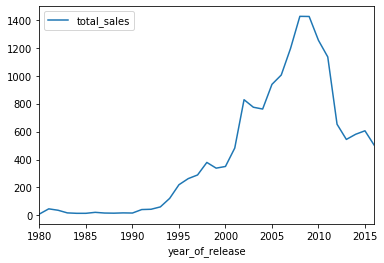

In [54]:
#построим сводную таблицу и график
games.pivot_table(index='year_of_release', values=['total_sales'], aggfunc = 'count').plot()

Посмотрим, сколько игр выпускалось в разные годы. Для этого сгруппируем таблицу по годам с помощью сводной таблицы. Видим, что данные содержат информацию с 1980 по 2016 год, количество игр возрастает вплоть до 2008 года, на который приходится максимальное значение. Далее происходит спад. 

Условно можно разделить данные на четыре периода:
 * 1980-1993 (продажи до 100 игр в год)
 * 1994-2005 (продажи от 100 до 1000 игр в год)
 * 2006-2011 (продажи свыше 1000 игр)
 * 2012-2016 (снова продажи до 1000)

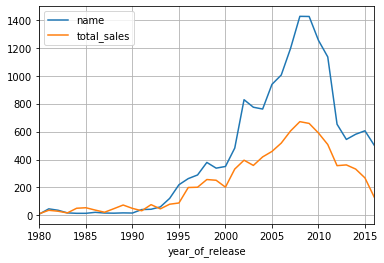

In [55]:
#построим графики для названий игр и продаж
plot = (games
       .groupby(['year_of_release'])
       .agg({'name': 'count', 'total_sales': 'sum'})
       .reset_index(level = 'year_of_release')
)

plot.plot(x = 'year_of_release', grid = True)

Посмотрим, как менялись продажи с помощью распределения по годам. На нем мы видим, что подъем продаж начинается с 1994 года, а пик приходится на 2008. Появление игр имеет такой же тип графика, с чуть менее выраженным пиком. В период с 1980 до 1994 года примерно каждые 4 года появляются новые платформы, затем этот срок увеличивается, платформы живут от 8 до 12 лет. 

In [56]:
#сделаем срез по годам
actual_games = games.query('year_of_release >= 2012')
#print(actual_games)

Исходя из количества продаж по периодам, за актуальный период можно принять предшествующее исследованию пятилетие. В данном случае, это будет период с 2012 по 2016 гг. 
Сделаем срез по данному периоду методом query() и сохраним его как actual_games.

In [57]:
#построим сводную таблицу и график
actual_games_pivot_plot = (actual_games
    .pivot_table(index=['platform'], values=['total_sales'], aggfunc = 'sum')    
)

#отдельно сохраним 5 ведущих платформ
leader_platform = actual_games_pivot_plot.sort_values(by = 'total_sales', ascending = False).reset_index().head(5)
leader_platform

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Построим сводную таблицу и график по новому срезу данных. Видим, что по продажам лидируют платформы PS4, PS3, X360, 3DS, XOne.  Их можно считать потенциально прибыльными. 

(0, 3)

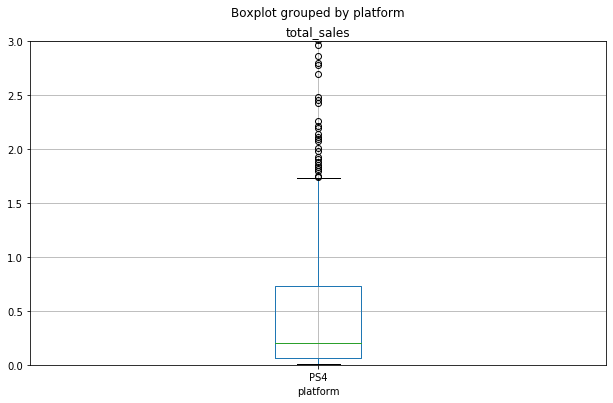

In [58]:
#построим ящик с усами для платформы PS4
ax = (actual_games
    .query('platform == "PS4"')
    .boxplot('total_sales', by = 'platform', figsize = (10, 6))
)
ax.set_ylim(0, 3)

Построим ящик с усами для платформы PS4. Медиана лежит примерно на значении 20 млн, а в целом продажи варьируются по сумме от 5 до 75 млн.

(0, 3)

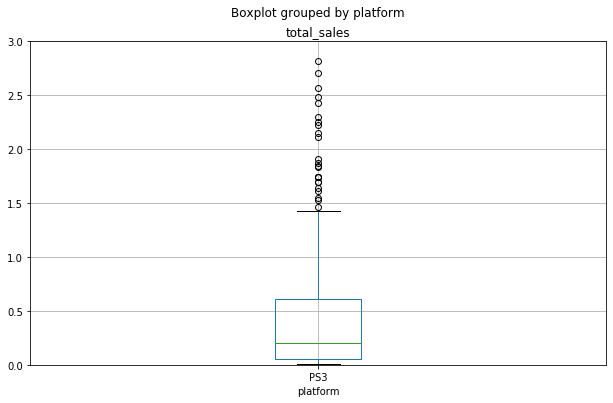

In [59]:
#построим ящик с усами для платформы PS3
ax = (actual_games
    .query('platform == "PS3"')
    .boxplot('total_sales', by = 'platform', figsize = (10, 6))
)
ax.set_ylim(0, 3)

Построим ящик с усами для платформы PS3. Медиана лежит примерно на значении 20 млн, а в целом продажи варьируются по сумме от 5 до 60 млн.

(0, 3)

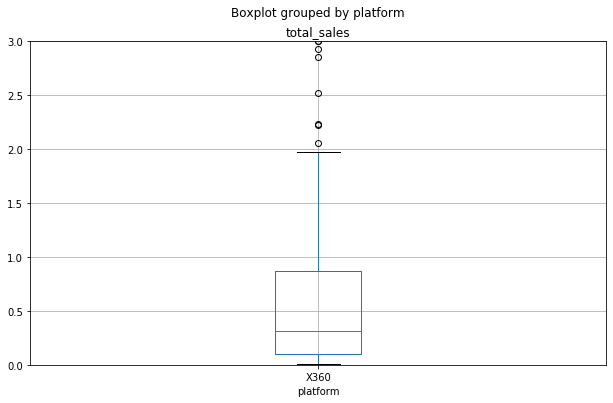

In [60]:
#построим ящик с усами для платформы X360
ax = (actual_games
    .query('platform == "X360"')
    .boxplot('total_sales', by = 'platform', figsize = (10, 6))
)
ax.set_ylim(0, 3)

Построим ящик с усами для платформы X360. Медиана лежит примерно на значении 30 млн, а в целом продажи варьируются по сумме от 15 до 85 млн.

(0, 3)

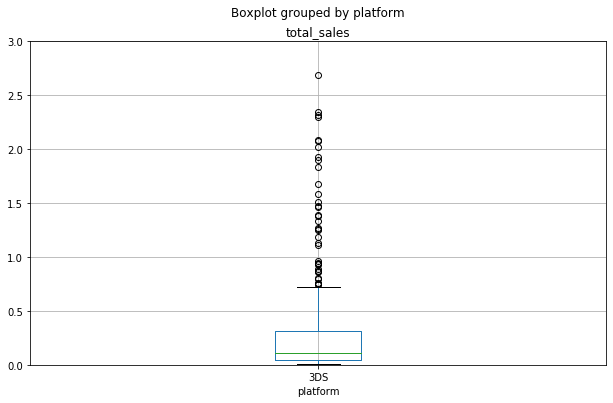

In [61]:
#построим ящик с усами для платформы 3DS
ax = (actual_games
    .query('platform == "3DS"')
    .boxplot('total_sales', by = 'platform', figsize = (10, 6))
)
ax.set_ylim(0, 3)

Построим ящик с усами для платформы 3DS. Медиана лежит примерно на значении 10 млн, а в целом продажи варьируются по сумме от 5 до 30 млн.

(0, 3)

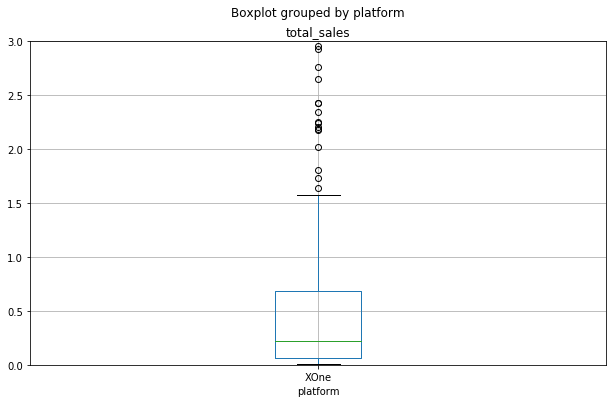

In [62]:
#построим ящик с усами для платформы XOne
ax = (actual_games
    .query('platform == "XOne"')
    .boxplot('total_sales', by = 'platform', figsize = (10, 6))
)
ax.set_ylim(0, 3)

Построим ящик с усами для платформы XOne. Медиана лежит примерно на значении 20 млн, а в целом продажи варьируются по сумме от 5 до 70 млн.

На графикам «ящик с усами» по глобальным продажам игр на пяти ведущих платформах видим, что разница в продажах велика не везде. Больше всего выделяется по продажам в лучшую сторону платформа X360, а в худшую - платформа 3DS.

In [63]:
#посмотрим средние значения по платформам
actual_games.query('platform == "PS4"').mean()

year_of_release    2015.145408
na_sales              0.277398
eu_sales              0.359923
jp_sales              0.040714
other_sales           0.123342
critic_score         46.344388
user_score            4.424235
total_sales           0.801378
dtype: float64

In [64]:
actual_games.query('platform == "PS3"').mean()

year_of_release    2013.446247
na_sales              0.209696
eu_sales              0.216755
jp_sales              0.071582
other_sales           0.087748
critic_score         31.064909
user_score            3.750101
total_sales           0.585781
dtype: float64

In [65]:
actual_games.query('platform == "X360"').mean()

year_of_release    2013.226027
na_sales              0.479623
eu_sales              0.255205
jp_sales              0.005377
other_sales           0.069863
critic_score         41.503425
user_score            5.006507
total_sales           0.810068
dtype: float64

In [66]:
actual_games.query('platform == "3DS"').mean()

year_of_release    2013.750000
na_sales              0.139672
eu_sales              0.107677
jp_sales              0.221692
other_sales           0.022399
critic_score         18.335859
user_score            2.024747
total_sales           0.491439
dtype: float64

In [67]:
actual_games.query('platform == "XOne"').mean()

year_of_release    2014.951417
na_sales              0.377004
eu_sales              0.208866
jp_sales              0.001377
other_sales           0.057773
critic_score         50.170040
user_score            4.805263
total_sales           0.645020
dtype: float64

Что касается средних продаж на разных платформах, то здесь тоже лидирует платформа Х360 (0,81 млн), близко к ней находится PS4 (0,80 млн). дальше по убыванию располагаются XOne (0,64), PS3 (0,58) и 3DS (0,49). То есть наблюдения подтверждаются.

In [68]:
#посмотрим корреляцию для платформы XOne
corr = (actual_games
    .query('platform == "XOne"')
    .corr()
)
corr.style.background_gradient(cmap = 'coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.242667,-0.194925,-0.12705,-0.243414,-0.00833764,-0.00128419,-0.239183
na_sales,-0.242667,1,0.765367,0.425725,0.988088,0.25974,0.112752,0.970433
eu_sales,-0.194925,0.765367,1,0.421071,0.852986,0.259398,0.105354,0.898045
jp_sales,-0.12705,0.425725,0.421071,1,0.441717,0.149927,0.0903037,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1,0.270032,0.113772,0.995238
critic_score,-0.00833764,0.25974,0.259398,0.149927,0.270032,1,0.774153,0.274839
user_score,-0.00128419,0.112752,0.105354,0.0903037,0.113772,0.774153,1,0.116563
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.274839,0.116563,1


Посмотрим, как влияют на продажи внутри одной популярной платформы (XOne) отзывы пользователей и критиков. Для этого посчитаем корреляцию между отзывами и продажами. Видим, что коэффициент корреляции в обоих случаях положительный (чем лучше отзывы, тем выше продажи), но невысокий: 0,27 с оценками критиков и 0,11 с оценками пользователей. Иными словами, оценки не очень влияют на продажи, либо влияют не только они.

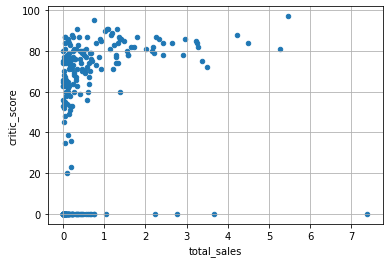

In [69]:
#построим диаграмму рассеяния для отзывов критиков
(actual_games
    .query('platform == "XOne"')
    .plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
)

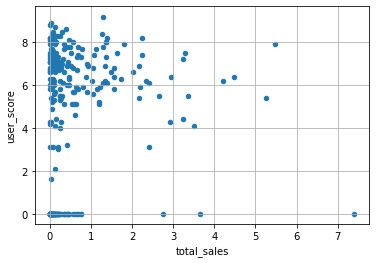

In [70]:
#и диаграмму рассеяния для отзывов пользователей
(actual_games
    .query('platform == "XOne"')
    .plot(x='total_sales', y='user_score', kind='scatter', grid=True)
)

Построим диаграммы рассеяния. Для отзывов критиков и пользователей они в целом подобны. На обеих мы видим, что большинство отзывов достаточно высоки, однако основное количество продаж при большом скоплении хороших оценок находится в зоне до 1 млн. По диаграммам мы еще раз убеждаемся, что влияние отзывов критиков на цену чуть сильнее, чем оценок пользователей. С увеличением продаж значения оценок критиков тяготеют всё выше. А вот оценки пользователей остаются примерно на том же уровне. Но всё-таки в обоих случаях эта зависимость не абсолютная: оценки - не единственный и не главный фактор, определяющий продажи игр.

In [71]:
#посмотрим корреляцию для других платформ
corr = (actual_games
    .query('platform != "XOne"')
    .corr()
)
corr.style.background_gradient(cmap = 'coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.10928,-0.0531447,-0.0471768,-0.0540771,-0.0943109,-0.0496514,-0.0864169
na_sales,-0.10928,1,0.775336,0.296243,0.795338,0.247571,0.19304,0.921978
eu_sales,-0.0531447,0.775336,1,0.273386,0.941032,0.252284,0.184496,0.929636
jp_sales,-0.0471768,0.296243,0.273386,1,0.206799,-0.00283187,-0.0164126,0.468411
other_sales,-0.0540771,0.795338,0.941032,0.206799,1,0.246874,0.183398,0.909067
critic_score,-0.0943109,0.247571,0.252284,-0.00283187,0.246874,1,0.841195,0.244412
user_score,-0.0496514,0.19304,0.184496,-0.0164126,0.183398,0.841195,1,0.181552
total_sales,-0.0864169,0.921978,0.929636,0.468411,0.909067,0.244412,0.181552,1


Для сравнения посмотрим корреляцию оценок и продаж для всех остальных платформ за актуальный период. Видим ту же картину и подобное соотношение коэффициента корреляции: немного сильнее с оценками критиков (0,24) и слабее с оценками пользователей (0,18). Таким образом, выводы актуальны для большинства платформ.

In [72]:
#сгруппируем данные по жанрам - количеству и продажам
(actual_games
       .groupby(['genre'])
       .agg({'name': 'count', 'total_sales': 'sum'})
       .reset_index(level = 'genre')
)

,genre,name,total_sales
0,Action,1031,441.12
1,Adventure,302,29.43
2,Fighting,109,44.49
3,Misc,192,85.04
4,Platform,85,61.00
5,Puzzle,28,4.89
6,Racing,115,53.50
7,Role-Playing,370,192.80
8,Shooter,235,304.73
9,Simulation,80,35.12


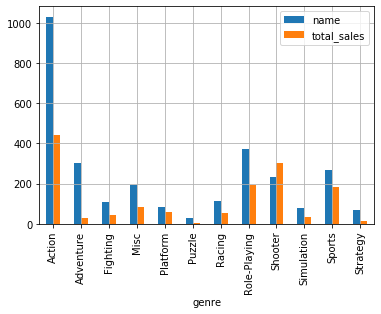

In [73]:
#построим график по жанрам
plot = (actual_games
       .groupby(['genre'])
       .agg({'name': 'count', 'total_sales': 'sum'})
       .reset_index(level = 'genre')
)

plot.plot(kind = 'bar', x = 'genre', grid = True)

Посмотрим на общее распределение игр по жанрам с помощью графика, отображающего количество игр для каждого жанра и количество продаж. 
Самыми прибыльными жанрами являются Action (441.12 млн), Shooter (304.73 млн) и Sports (181.07 млн). 
Action явно лидирует по количеству выпущенных игр (1031). Ниже находятся такие жанры, как Role-Playing (370 игр), Adventure (302 игры), Sports (268) и Misc (192).

### Шаг 4. Составление портрета пользователя каждого региона

In [74]:
#построим сводную таблицу по платформам в регионе na, сгруппируем, отсортируем, выведем топ-5
(actual_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False).head(5)
)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [75]:
#построим сводную таблицу по платформам в регионе eu, сгруппируем, отсортируем, выведем топ-5
(actual_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False).head(5)
)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [76]:
#построим сводную таблицу по платформам в регионе gp, сгруппируем, отсортируем, выведем топ-5
(actual_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False).head(5)
)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Из полученных данных видим, что ведущие платформы в регионах существенно различаются, особенно в Японии.
В США лидирует платформа X360; в Европе она занимает третье место, а в топ-5 по Японии она вообще не попала.
PS4 лидирует в Европе; в США занимает второе место, а в Японии - четвертое.
PS3 занимает второе место в Европе и Японии, в США - третье.
XOne находится на четвертой позиции в США и Европе; в Японии она не попала в топ-5.
3DS в Японии лидирует, а в США и Европе занимает последнее - 5 место.

In [77]:
#построим сводную таблицу по жанрам в регионе na, сгруппируем, отсортируем, выведем топ-5
(actual_games.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False).head(5)
)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [78]:
#построим сводную таблицу по жанрам в регионе eu, сгруппируем, отсортируем, выведем топ-5
(actual_games.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False).head(5)
)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [79]:
#построим сводную таблицу по жанрам в регионе jp, сгруппируем, отсортируем, выведем топ-5
(actual_games.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False).head(5)
)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


Посмотрим самые популярные жанры (топ-5) по регионам. Здесь еще больше совпадений в США и Европе; Япония по-прежнему отличается.
Жанры Action, Shooter и Sports и Role-Playing занимают первые четыре места в США и Европе. В Японии Action находится на втором месте, Role-Playing лидирует, а Shooter и Sports отсутствуют в топ-5.
Жанр Misc в США находится на последнем месте, в Японии - на третьем, а в Европе не вошел в топ-5.
Четвертую и пятую позиции в Японии занимают жанры Simulation и Fighting соответственно.

In [80]:
#построим сводную таблицу по продажам в регионе na и рейтингу
(actual_games.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
)

,na_sales
rating,
M,231.57
E,114.37
E10+,75.70
T,66.02


In [81]:
#построим сводную таблицу по продажам в регионе eu и рейтингу
(actual_games.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False)
)

,eu_sales
rating,
M,193.96
E,113.03
E10+,55.37
T,52.96


In [82]:
#построим сводную таблицу по продажам в регионе jp и рейтингу
(actual_games.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False)
)

,jp_sales
rating,
E,28.33
T,26.02
M,21.20
E10+,8.19


Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.
В Европе и США одинаковое распределение популярности рейтингов: на первом месте продажи игр с рейтингом М, затем Е, Е10+ и Т.
В Японии соотношение иное. На первом месте игры с рейтингом Е, затем Т и М, и меньше всего продается игр с рейтингом Е10+.
Таким образом, рейтинг влияет на уровень продаж, и на рынке Японии популярны игры не с такими рейтингами, как в Европе и США.

### Шаг 5. Проверка гипотез

In [83]:
#сохраним в переменные средние пользовательские рейтинги платформ Xbox One и PC
Xbox_mean_user_score = actual_games.query('platform == "XOne"')['user_score']
PC_mean_user_score = actual_games.query('platform == "PC"')['user_score']

#проверим гипотезу
alpha = 0.05
results = st.ttest_ind(
    Xbox_mean_user_score, 
    PC_mean_user_score, equal_var = False)

print('p-значение:', results.pvalue)
#задаем условие
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06811033795099536
Не получилось отвергнуть нулевую гипотезу


Выясним, одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC.

Для этого нужно сформулировать двухстороннюю нулевую гипотезу, характерным признаком которой будет знак равенства в формулировке, и альтернативную, в формулировке которой будет знак неравенства.

Сформулируем нулевую гипотезу: средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC. Альтернативная гипотеза: средние пользовательские рейтинги платформы Xbox One не равны средним пользовательским рейтингам платформы PC.

Получилась гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Для нее подходит метод scipy.stats.ttest_ind (array1, array2, equal_var): он возвращает статистику разности между сравниваемыми значениями и уровень значимости для этой статистики. По результатам его работы мы понимаем, стоит ли отвергать нулевую гипотезу.

Результат - не получилось отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги платформ Xbox One и PC близки по значению.

In [84]:
#сохраним в переменные средние пользовательские рейтинги  жанров Action и Sports
Action_mean_user_score = actual_games.query('genre == "Action"')['user_score']
Sports_mean_user_score = actual_games.query('genre == "Sports"')['user_score']

#проверим гипотезу
alpha = 0.05
results = st.ttest_ind(
    Xbox_mean_user_score, 
    PC_mean_user_score, equal_var = False)

print('p-значение:', results.pvalue)
#задаем условие
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06811033795099536
Не получилось отвергнуть нулевую гипотезу


Выясним, различаются ли средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»).

Сформулируем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза:  средние пользовательские рейтинги жанров Action и Sports не равны.

Результат - не получилось отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports близки по значению.

### Шаг 6. Общий вывод

Закономерности, определяющие успешность игры - это:

 * предварительное изучение ситуации на рынке компьютерных игр за актуальный период (в данном случае - 5 лет до планируемого года);
 * размещение игр на платформах, лидирующих в данный период, с учетом срока жизни платформы (для рассмотренного периода этот отрезок составляет в среднем 8 лет);
 * соотнесение выбора платформы с регионом планируемых продаж (в США, Европе и Японии популярны разные платформы);
 * жанровая ориентированность на определенный регион (в США и Европе приверженность определенным жанром подобна, в Японии - отличается);
 * рейтинговая (по ESRB) ориентированность на регион (в Японии предпочитают игры совершенно других рейтингов, чем в США и Европе).
 
Оценки критиков и пользователей не следует рассматривать как определяющие в планировании продаж, поскольку их корреляция с продажами невелика, средние пользовательские рейтинги разных жанров и средние пользовательские рейтинги разных платформ близки по значению.